# Coordinates and Dimensions of ECCOv4 NetCDF files

## Objectives

Introduce the student ot the idea that the ECCO v4 NetCDF fields have coordinate labels which shows *where* these fields are on the Arakawa-C grid.

## Introduction

The ECCOv4 files are provided as NetCDF files.  The file you have may look a little different than the ones shown here because we have been working hard at improving how what exactly goes into our NetCDF files.  

This tutorial document is current as of Sep 2019 with the ECCOv4 NetCDF grid files provided in the following directories:

https://ecco.jpl.nasa.gov/drive/files/Version4/Release3_alt (po.daac drive, recommended)

https://web.corral.tacc.utexas.edu/OceanProjects/ECCO/ECCOv4/Release3_alt/  (mirror at U. Texas, Austin)


As we showed in the first tutorial, we can use the `open_dataset` method from `xarray` to load a NetCDF tile file into Python as a `Dataset` object.  `open_dataset` is very convenient because it automatically parses the NetCDF file and constructs a `Dataset` object using all of the  dimensions, coordinates, variables, and metadata information.  

In the last tutorial we analyzed the contents of a single ECCOv4 file, the 2010 monthly-averaged potential temperature.  Let's load it up again and take a closer look at its coordinates.  This time we'll name the new `Dataset` object *theta_dataset* since we are loading the file using `open_dataset`.

In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
## Import the ecco_v4_py library into Python
## =========================================
## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.  For example, if your ecco_v4_py
##    files are in /Users/ifenty/ECCOv4-py/ecco_v4_py, then use:
sys.path.append('/home/ifenty/ECCOv4-py')

import ecco_v4_py as ecco

In [3]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================
# base_dir = '/home/username/'
base_dir = '/home/ifenty/ECCOv4-release'

## define a high-level directory for ECCO fields
ECCO_dir = base_dir + '/Release3_alt'

In [4]:
## LOAD NETCDF FILE
## ================

# directory containing the file
data_dir= ECCO_dir + '/nctiles_monthly/THETA/'

# filename
fname = 'THETA_2010.nc'

# load the file
theta_dataset = xr.open_dataset(data_dir + fname).load()

Before we get started, plot the temperature field at the surface layer (k=0) for tile 2, NE Atlantic..

> Note :: Don't worry about the complicated looking code below, w'll cover plotting later

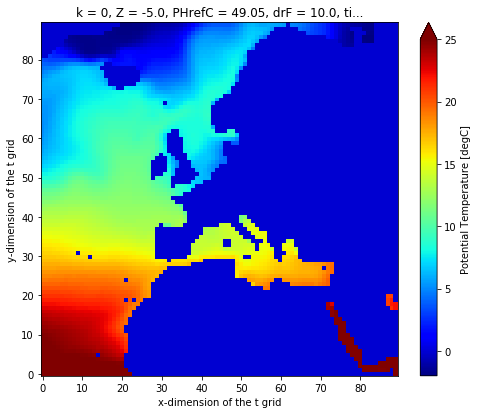

In [5]:
fig=plt.figure(figsize=(8, 6.5))
theta_dataset.THETA.isel(k=0,tile=2,time=0).plot(vmin=-2, vmax=25, cmap='jet')

## The Dimensions and Coordinates of *THETA*

Let's take a closer look at what is inside this dataset.  We suppress the metadata (attrs) just to reduce how much is printed to the screen.

In [6]:
theta_dataset.attrs = []
theta_dataset

<xarray.Dataset>
Dimensions:    (i: 90, j: 90, k: 50, nv: 2, tile: 13, time: 12)
Coordinates:
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    XC         (tile, j, i) float32 -111.60647 -111.303 ... -111.86579
    YC         (tile, j, i) float32 -88.24259 -88.382515 ... -88.07871 -88.10267
    rA         (tile, j, i) float32 362256450.0 363300960.0 ... 361119100.0
    hFacC      (tile, k, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    time_bnds  (time, nv) datetime64[ns] 2010-01-01 2010-02-01 

### Dimensions

*theta_dataset* shows six dimensions, **i**, **j**, **k**, **tile**, **time**, and **nv**.  Recall that ``Dataset`` objects are containers and so it lists all of the  **unique** dimensions of the variables it is storing.  *theta_dataset* is storing a single *Data variable*, *THETA*.  We see that this *THETA* field is five dimensional from the (**tile**, **time**, **k**, **j**, **i**) in the line:
~~~
THETA      (time, tile, k, j, i) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
~~~
Examining the coordinates of the ``Dataset``, we find that all of them have some combination of the six dimensions.  Note **nv** is not a spatial or temporal dimension per se. It is a kind of dummy dimension of length 2 for the coordiante **time_bnds** which has both a starting and ending time for each one averaging period.  

### Coordinates

#### Dimension Coordinates

Beyond having three spatial dimensions *theta_dataset* also has *coordinates* in the **i**, **j**, and **k** directions.  The most basic coordinates are 1D vectors, one for each dimension, which contain *indices* for the array.  Let us call these basic coordinates, *dimension coordinates*.  Here we use 0 as the first index of dimension coordinates
```
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2010-12-16T12:00:00
```

Let's examine each *Dimension Coordinate* more closely

##### Dimension Coordinate ``i``

In [7]:
theta_dataset.i

<xarray.DataArray 'i' (i: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int32)
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
Attributes:
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC
    axis:           X

*i* is an array of integers from 0 to 89 indicating the *x_grid_index* along this tile's *X* axis.

##### Dimension Coordinate ``j``

In [8]:
theta_dataset.j

<xarray.DataArray 'j' (j: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int32)
Coordinates:
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
Attributes:
    long_name:      y-dimension of the t grid
    standard_name:  y_grid_index
    swap_dim:       YC
    axis:           Y

*j* is an array of integers from 0 to 89 indicating the *y_grid_index* along this tile's *Y* axis.

##### Dimension Coordinate ``k``

In [9]:
theta_dataset.k

<xarray.DataArray 'k' (k: 50)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int32)
Coordinates:
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    Z        (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC   (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF      (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
Attributes:
    long_name:      z-dimension of the t grid
    standard_name:  z_grid_index
    swap_dim:       Z
    axis:           Z

*k* is an array of integers from 0 to 49 indicating the *z_grid_index* along this tile's *Z* axis.

##### Dimension Coordinate ``tile``

In [10]:
theta_dataset.tile

<xarray.DataArray 'tile' (tile: 13)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)
Coordinates:
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  tile_index

*tile* is an array of integers from 0 to 12, one for each tile of the lat-lon-cap grid.

##### Dimension Coordinate ``time``

In [11]:
theta_dataset.time

<xarray.DataArray 'time' (time: 12)>
array(['2010-01-16T12:00:00.000000000', '2010-02-15T12:00:00.000000000',
       '2010-03-16T12:00:00.000000000', '2010-04-16T12:00:00.000000000',
       '2010-05-16T12:00:00.000000000', '2010-06-15T12:00:00.000000000',
       '2010-07-16T12:00:00.000000000', '2010-08-16T12:00:00.000000000',
       '2010-09-15T12:00:00.000000000', '2010-10-16T12:00:00.000000000',
       '2010-11-16T12:00:00.000000000', '2010-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    iter     (time) int32 158532 159204 159948 160668 ... 165084 165804 166548
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2010-12-16T12:00:00
Attributes:
    long_name:      center time of averaging period
    standard_name:  time
    bounds:         time_bnds
    axis:           T

In this file the *time* coordinate indicates the *center time of the averaging period*.  Recall that we loaded the monthly-mean ``THETA`` fields for  2010, so the *center time of the averaging periods* are the middle of each month in 2010.

#### Other Coordinates

Notice some *coordinates* do not have an **"\*"** in front of their names:
```             
Coordinates:
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    XC         (tile, j, i) float32 -111.60647 -111.303 ... -111.86579
    YC         (tile, j, i) float32 -88.24259 -88.382515 ... -88.07871 -88.10267
    rA         (tile, j, i) float32 362256450.0 363300960.0 ... 361119100.0
    hFacC      (tile, k, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    time_bnds  (time, nv) datetime64[ns] 2010-01-01 2010-02-01 ... 2011-01-01
    iter       (time) int32 158532 159204 159948 160668 ... 165084 165804 166548
```

These are so-called [non-dimension coordinates](http://xarray.pydata.org/en/stable/data-structures.html#coordinates).  From the xarray documenation:

```
1. non-dimension coordinates are variables that [may] contain coordinate data, 
   but are not a dimension coordinate. 

2. They can be multidimensional ... and there is no relationship between 
   the name of a non-dimension coordinate and the name(s) of its dimension(s). 

3. Non-dimension coordinates can be useful for indexing or plotting; ...
```

Four of these variables contain spatial coordinate data:

* **XC** and **YC**, the longitude and latitudes of the 'c' points (varies with **tile**, **j** and **i**)
* **Z** the center depth of tracer cells (varies only with **k**)
* **PHrefC**, a reference pressure of tracer cells (varies only with **k**)

Two of these variables have *spatial dimensions* but are not coordinates in a traditional sense (and they will be removed in future ECCOv4 releases because their presence here makes no sense).

* **hFacC**, the fraction (0,1) of a tracer grid cell height which is wet (varies with **tile**, **k**, **j**, and **i**) 
* **drF**, the distance between the top and bottom of a tracer grid cell (varies only with **k**)
* **rA**, model grid cell area (varies with **tile**, **j** and **i**)

Three non-dimension coordinates do not have any spatial dimensions!  

* **iter**, the time step of the model (time iteration) when the record was saved 
* **time**, a calendar date and time 
* **time_bnds**, a 1x2 array of calendar dates and times indicating the start and end times of the averaging period of the field

When multiple DataArrays from different tiles and times are combined, the dimensions of the merged arrays will expand along the **time** and **tile** dimensions.   

Let's quickly look at the **time_bnds** coordinate:

In [12]:
theta_dataset.time_bnds

<xarray.DataArray 'time_bnds' (time: 12, nv: 2)>
array([['2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000'],
       ['2010-02-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000'],
       ['2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000'],
       ['2010-04-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000'],
       ['2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000'],
       ['2010-06-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000'],
       ['2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000'],
       ['2010-08-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000'],
       ['2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000'],
       ['2010-10-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000'],
       ['2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000'],
       ['2010-12-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000']],
      dtype='datetime64[ns]')
Coordinates:
    tim

For time-averaged fields, **time_bnds** is a 2D array provding the *start* and *end* time of each averaging period.  

Let's look at the third record (March, 2010)

In [13]:
theta_dataset.time_bnds[2]

<xarray.DataArray 'time_bnds' (nv: 2)>
array(['2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    iter       int32 159948
    time       datetime64[ns] 2010-03-16T12:00:00
Dimensions without coordinates: nv
Attributes:
    long_name:      time bounds of averaging period
    standard_name:  time_bounds

We see that the time bounds are 2010-03-10 to 2010-04-01, which make sense.
  
Having this time-bounds information readily available can be very helpful.

## The Dimension Coordinates of the Arakawa C-Grid

Dimension coordinates have special meanings.  The MITgcm uses the staggered Arakawa-C grid (hereafter c-grid). In c-grid models, variables are staggered in space.  Horizontally, variables are associated with three 'locations': 

1. tracer cells (e.g. temperature, salinity, density)
2. the 4 lateral faces of tracer cells (e.g., horizontal velocities and fluxes) 
3. the 4 corners of tracer cells (e.g., vertical component of vorticity field)

Vertically, there are also two 'locations': 

1. tracer cells
2. the 2 top/bottom faces of tracer cells (e.g., vertical velocities and fluxes).

To understand this better, let's review the geometry of c-grid models.

### 3D staggering of velocity components. 

Paraphrasing from https://mitgcm.readthedocs.io/en/latest/algorithm/c-grid.html,

~~~
In c-grid models, the components of flow (u,v,w) are staggered in 
space such that the zonal component falls on the interface between 
tracer cells in the zonal direction. Similarly for the meridional 
and vertical directions. 
~~~

#### Why the c-grid?

~~~
The basic algorithm employed for stepping forward the momentum 
equations is based on retaining non-divergence of the flow at 
all times. This is most naturally done if the components of flow
are staggered in space in the form of an Arakawa C grid...
~~~

![uvw-grid](../figures/uvw.png )


### Defining the c-grid coordinate system

As shown, variables on Arakawa-C grids (c-grid) are staggered in space.  For convenience we  define a coordinate system that distinguishes between these different locations.

#### The c-grid horizontal coordinates

In the horizontal, variables can take one of four locations: **c**, **u**, **v**, or **g**.  

![c-grid](../figures/C-grid-points.png )


##### horizontal "c" location

Variables associated with tracer cell area or volumetric averages (e.g., temperature, salinity, sea ice thickness, air-sea net heat flux) and variables associated with vertical velocities (e.g., $\vec w$) are identified with **c** locations.

For these variables we define the horizontal dimensions of **i** and **j**, corresponding with the model grid $x$ and $y$ directions, respectively.  

##### horizontal "u" location

Variables associated with the two lateral sides of tracer cells in the $x$ direction are identified with **u** locations. 

Define the horizontal dimensions of **u** variables as **i_g** and **j**, corresponding with the model's $x$ and $y$ dimensions, respectively.  

> **Important Note**: In the llc90 curvilinear model grid used by ECCOv4, the $x$ direction is **NOT** same as the geographic zonal (east-west) direction.

##### horizontal "v" location

Variables associated with the two lateral sides of tracer cells in the $y$ direction are identified with **v** locations. 

Define the horizontal dimensions of **v** variables as **i** and **j_g**, corresponding with the model's $x$ and $y$ dimensions, respectively.

> **Important Note**: In the llc90 curvilinear model grid used by ECCOv4, the $y$ direction is **NOT** same as the geographic meridional (north-south) direction.


##### horizontal "g" location

Variables associated with the horizontal corners of tracer grid cells are identified with **g** locations.

Define the horizontal dimensions of **g** variables as **i_g** and **j_g**, corresponding with the model's $x$ and $y$ dimensions, respectively.  

#### The c-grid vertical coordinates

In the horizontal, variables can take one of two locations: **c** and **w**

#### vertical "c" location

Variables associated with tracer cell volumetric quantities (e.g., temperature, salinity) are identified with **c** locations.

For these variables we define the vertical dimensions of **k** which corresponds with the model grid' $z$ direction.

#### vertical "w" location

Variables associated with the two top/bottom sides of tracer cells in the $z$ direction are identified with **w** locations. 

For these variables we define the vertical dimension of **$k_u$** to indicate the model tracer cell's **u**pper faces in the $k$ direction, respectively.  

Two other vertical dimensions are also used.  **$k_l$** indicates the model tracer cell's **l**ower faces, and $k_{p1}$ which index all of the **upper** and **lower** faces.  

> Note: In ECCOv4 NetCDF files both **$k_u$**(0) and **$k_{p1}$**(0) correspond to the same top face of the model tracer grid cell.

## All ECCOv4 coordinates

Now that we have been oriented to the dimensions and coordinates used by ECCOv4, let's load up and examinea a ``Dataset`` that uses all of them, an ECCOv4 NetCDF grid file. 

Open the ECCOv4 grid file associated with tile 2:

In [14]:
grid_dir = ECCO_dir + '/nctiles_grid/'
print(grid_dir)
## load the grid
grid_dataset = xr.open_dataset(grid_dir + 'ECCOv4r3_grid.nc')

# show contents of grid_dataset
grid_dataset

/home/ifenty/ECCOv4-release/Release3_alt/nctiles_grid/


<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 ...
    YC         (tile, j, i) float32 ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    CS      

### Dimensions
`Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13)`

The *Dimensions* list now lists the six different coordinates and their dimension used by variables stored in this new grid tile `Dataset` object.  

### Dimension Coordinates 


```
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
``` 

We note that horizontal coordindates have 90 indices [0..89], *ku* and *kl* have 50 [0..49] and *kp1* has 51 [0..50]


### Non-Dimension Spatial Coordinates

Some non-dimension coordinates are spatial coordinates.
* XC, YC : longitude and latitude of tracer cell centers
* XG, YG : longitude and latitude of tracer cell corners
* Z_l, Z_u, Z_p1 : depths of tracer cell lower and upper faces
* Z : depths of tracer cell centers
* PHrefC, PHrefF : reference pressures at tracer cell centers and upper and lower faces

```
    XC       (tile, j, i) float32 -111.60647 -111.303 ... -105.58465 -111.86579
    YC       (tile, j, i) float32 -88.24259 -88.382515 ... -88.07871 -88.10267
    XG       (tile, j_g, i_g) float32 -115.0 -115.0 ... -102.928925 -108.95171
    YG       (tile, j_g, i_g) float32 -88.17569 -88.31587 ... -87.9892 -88.02409
    Zl       (k_l) float32 0.0 -10.0 -20.0 -30.0 ... -4834.0 -5244.5 -5678.0
    Zu       (k_u) float32 -10.0 -20.0 -30.0 -40.0 ... -5244.5 -5678.0 -6134.5
    Z        (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    Zp1      (k_p1) float32 0.0 -10.0 -20.0 -30.0 ... -5244.5 -5678.0 -6134.5
    PHrefC   (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    PHrefF   (k_p1) float32 0.0 98.1 196.2 ... 51448.547 55701.18 60179.445
```

While others describe the model grid geometry (areas, distances, distances, and geometric factors) and other information (model depth).  They are not coordinates in any meaningful sense but they *are essential for quantitative analysis*. 

horizontal distances:
```
    dxG      (j_g, i) float32 ...
    dyG      (j, i_g) float32 ...
    dxC      (j, i_g) float32 ...
    dyC      (j_g, i) float32 ...
```

vertical distances:
```
    drC      (k_p1) float32 ...
    drF      (k) float32 ...
```        

areas:
```
    rAs      (j_g, i) float32 ...
    rAw      (j, i_g) float32 ...
    rA       (j, i) float32 ...
    rAz      (j_g, i_g) float32 ...
```

geometric factors
```
    hFacS    (k, j_g, i) float32 ...
    hFacC    (k, j, i) float32 ...
    hFacW    (k, j, i_g) float32 ...
```    

seafloor depth
```
Depth    (j, i) float32 ...
```

These ancilliary fields are classified as non-dimension coordinates because we wanted to reserve *data variables* for variables that are part of the model solution.

In the end, it doesn't matter what you call these ancillary variables -- what matters is that you have them on hand for calculations.  If it makes you feel beter, use the function ``.reset_coords()`` to convert all non-dimension coordinates to data variables.  
~~~
grid_dataset.reset_coords()
~~~

### Non-Dimension Model Geometry Coordinates

Non-Dimension Model Geometry "Coordinates" are not coordinates in the sense that they help you orient in space or time, but they provide measures of the model grid such as distances and areas.  Let's examine one of these grid geometric variables, *dxG*:

In [15]:
grid_dataset.dxG

<xarray.DataArray 'dxG' (tile: 13, j_g: 90, i: 90)>
[105300 values with dtype=float32]
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    dxG      (tile, j_g, i) float32 ...
    dyC      (tile, j_g, i) float32 ...
    rAs      (tile, j_g, i) float32 ...
Attributes:
    standard_name:  cell_x_size_at_v_location
    long_name:      cell x size
    units:          m
    coordinate:     YG XC

``dxG`` has coordinates **tile**, **j_g** and **i** which means that it is a **v** location variable.  ``dxG`` is the horizontal distance between $g$ points (tracer cell corners) in the tile's $x$ direction.  

For reference, see the chart below from the MITgcm documentation, [Figure 2.6](https://mitgcm.readthedocs.io/en/latest/algorithm/horiz-grid.html "Fig 2.6")

dxG = $\Delta x_g$ in subfigure (a) below:

![hgrid](../figures/hgrid-abcd.svg)

*Figure 2.6 Staggering of horizontal grid descriptors (lengths and areas). The grid lines indicate the tracer cell boundaries and are the reference grid for all panels. a) The area of a tracer cell, 𝐴𝑐, is bordered by the lengths Δ𝑥𝑔 and Δ𝑦𝑔. b) The area of a vorticity cell, 𝐴𝜁, is bordered by the lengths Δ𝑥𝑐 and Δ𝑦𝑐. c) The area of a u cell, 𝐴𝑤, is bordered by the lengths Δ𝑥𝑣 and Δ𝑦𝑓. d) The area of a v cell, 𝐴𝑠, is bordered by the lengths Δ𝑥𝑓 and Δ𝑦𝑢.*

## Dimensions and Coordinates of *UVEL*

So far we looked *THETA* which is a $c$ variable.  Let's examine *UVEL*, horizontal velocity in the tile's $x$ direction.  As you've probably guessed, *UVEL* is a $u$ variable: 

Load tile 2 of the 2010 March average horizonatal velocity in the $x$ direction.

In [16]:
# Directory of the UVEL files
data_dir= ECCO_dir + '/nctiles_monthly//UVEL/'

fname = 'UVEL_2010.nc'
uvel_dataset = xr.open_dataset(data_dir + fname).load()
uvel_dataset.attrs = []

### ``UVEL`` context

Plot tile 1 time-mean horizontal velocity at the top-most model grid cell in the tile's $x$ direction

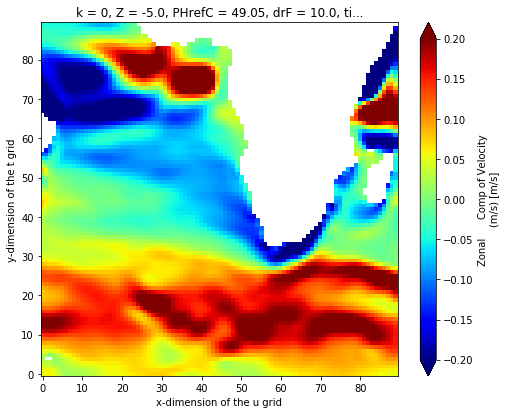

In [17]:
fig=plt.figure(figsize=(8, 6.5))
ud_masked = uvel_dataset.UVEL.where(uvel_dataset.hFacW > 0, np.nan)
ud_masked.isel(k=0,tile=1, time=0).plot(cmap='jet', vmin=-.2,vmax=.2)

Let's look at the dimensions and coordinates of *UVEL*

In [18]:
uvel_dataset.data_vars

Data variables:
    UVEL     (time, tile, k, j, i_g) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [19]:
uvel_dataset.coords

Coordinates:
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    dxC        (tile, j, i_g) float32 15583.418 15588.104 ... 23406.256
    rAw        (tile, j, i_g) float32 361699460.0 362790240.0 ... 364760350.0
    dyG        (tile, j, i_g) float32 23210.262 23273.26 ... 15595.26 15583.685
    hFacW      (tile, k, j, i_g) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    time_bnds  (time, nv) datetime64[ns] 2010-01-01 2010-02-01 ... 2011-01-01
    iter       (time) int32 158532 159204 159948 160668 ... 

### Dimension coordinates

As expected, ``UVEL`` has horizontal dimensions of **i_g, j**. Because ``UVEL`` is the velocity at the left and right faces of 3D tracer cells.

~~~
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2010-12-16T12:00:00
~~~

## Dimensions and Coordinates of *VVEL*

Finally, let's examine *VVEL*, horizontal velocity in the tile's $y$ direction.  As you've probably guessed, *VVEL* is a $v$ variable: 

In [20]:
# Directory of the VVEL files
data_dir= ECCO_dir + '/nctiles_monthly//VVEL/'

fname = 'VVEL_2010.nc'
vvel_dataset = xr.open_dataset(data_dir + fname).load()
vvel_dataset.attrs = []

### ``VVEL`` context

Plot the time-mean horizontal velocity in the tile's $y$ direction at model level 5 (55m) 

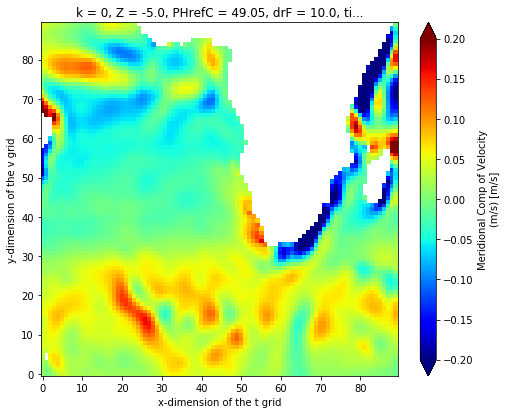

In [21]:
fig=plt.figure(figsize=(8, 6.5))
vd_masked = vvel_dataset.VVEL.where(vvel_dataset.hFacS > 0, np.nan)
vd_masked.isel(k=0,tile=1, time=0).plot(cmap='jet', vmin=-.2,vmax=.2)

In [22]:
vvel_dataset.data_vars

Data variables:
    VVEL     (time, tile, k, j_g, i) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [23]:
vvel_dataset.coords

Coordinates:
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    rAs        (tile, j_g, i) float32 179944260.0 180486990.0 ... 364150620.0
    dxG        (tile, j_g, i) float32 15584.907 15589.316 ... 23142.107
    dyC        (tile, j_g, i) float32 11563.718 11593.785 ... 15578.138
    hFacS      (tile, k, j_g, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    time_bnds  (time, nv) datetime64[ns] 2010-01-01 2010-02-01 ... 2011-01-01
    iter       (time) int32 158532 159204 159948 160668 ... 165084 1

### Dimension coordinates

As expected, *VVEL* has horizontal dimensions of **i, j_g**. Because *VVEL* is the velocity at the front and rear faces of 3D tracer cells we use **k** for its vertical coordinate.

~~~
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
~~~

## Summary

ECCOv4 variables are on the staggered Arakawa-C grid.  Different dimension labels and coordinates are applied to state estimate variables so that one can easily identify where on the c-grid any particular variable is situated.
